# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [13]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

city_data = []

for city in cities:
    query_url = url + "&q=" + city
    print(query_url)
    
    try:
        weather = requests.get(query_url).json()
        latitude = weather["coord"]["lat"]
        longitude = weather["coord"]["lon"]
        windspeed = weather["wind"]["speed"]
        temp = weather["main"]["temp"]
        country = weather["sys"]["country"]
        humidity = weather["main"]["humidity"]
        clouds = weather["clouds"]["all"]
        
        city_data.append({"Latitude":latitude,
                        "Longitude":longitude,
                        "Windspeed":windspeed,
                        "Temperature":temp,
                        "Country":country,
                        "Humidity":humidity,
                        "Cloudiness":clouds})
    except:
        pass

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=mount hagen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=aksum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=north bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=calatayud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=cehegin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=nerchinskiy zavod
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=kedrovyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=jinchang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=yorosso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=kambove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=hanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=hendijan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=matay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=baherden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=marsh harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=faan

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=krutinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=shitanjing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=kijang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=nanakuli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=de aar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=peniche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c2

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=nivala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=romny
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=tokzar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=hwange
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=warqla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=zonguldak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=kokoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=la macare

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=itupiranga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=soure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=damaturu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=vale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=marion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=muzhi
h

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=ngunguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=bakaly
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=kharp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=arona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=carahue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=asyut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=myshkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=mednogorsk
h

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=phan thiet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=masasi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=winona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&q=maloy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74f8a873186deff845959dbce31c27bb&

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_data_df = pd.DataFrame(city_data)
print(city_data_df)
save_data=city_data_df.to_csv('./cities.csv')
save_data

     Cloudiness Country  Humidity  Latitude  Longitude  Temperature  Windspeed
0            92      ZA        82    -34.53      20.04        64.40       3.36
1            12      ET        74      8.96      38.73        44.18       2.71
2            90      ZA        82    -33.93      18.42        62.60      11.41
3            75      PG        57     -5.86     144.23        75.20      11.41
4            20      NO        68     78.22      15.63        24.80       9.17
5             0      ET        82     14.12      38.72        47.06       2.48
6            92      BR        99    -30.17     -50.22        67.58       4.38
7             8      AU        84    -33.64     115.35        68.30       4.83
8            20      GR        87     39.42      22.43        53.60       2.24
9            56      JM        92     17.89     -77.59        74.33       4.50
10           90      CA        97     69.44    -133.03        32.00      10.29
11            1      US        81     26.05     -97.

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

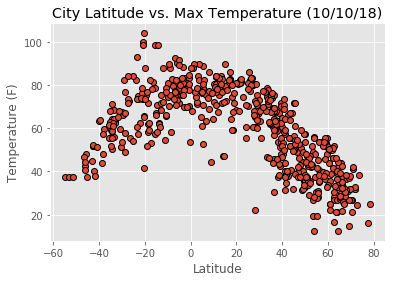

In [30]:
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

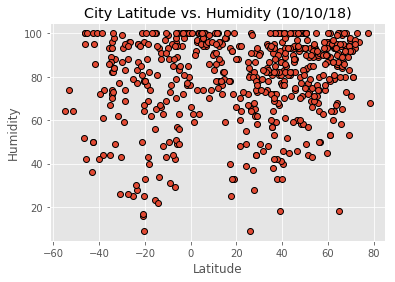

In [34]:
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("LatVsHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

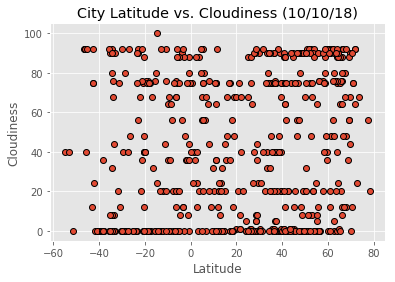

In [35]:
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("LatVsCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

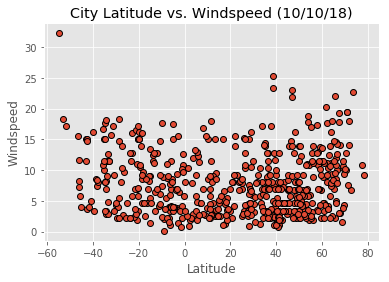

In [36]:
plt.scatter(city_data_df['Latitude'], city_data_df['Windspeed'], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Windspeed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.savefig("LatVsWind.png")
plt.show()